# Scaling - Cross Validation - Gridsearch

# Regularization (Ridge, Lasso, ElasticNet)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop(columns = "sales", axis =1)
y = df["sales"]

### Polynomial Conversion

In [5]:
from sklearn.preprocessing import PolynomialFeatures

We create an artificial overfiting situation by taking poly feature from 5 degrees

In [6]:
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [7]:
poly_features.shape

(200, 55)

### Train | Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

## Scaling the Data

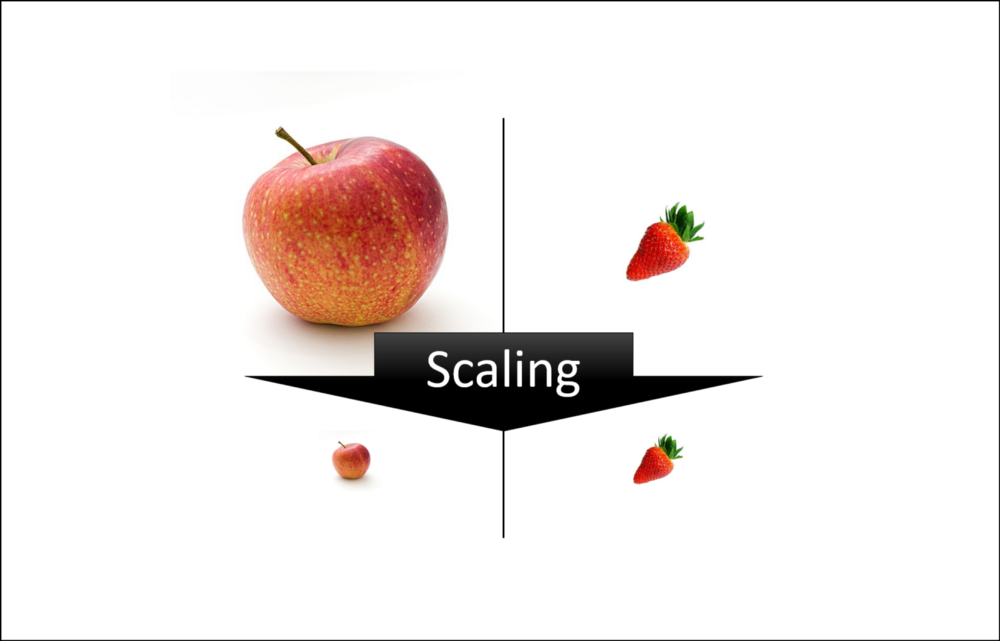

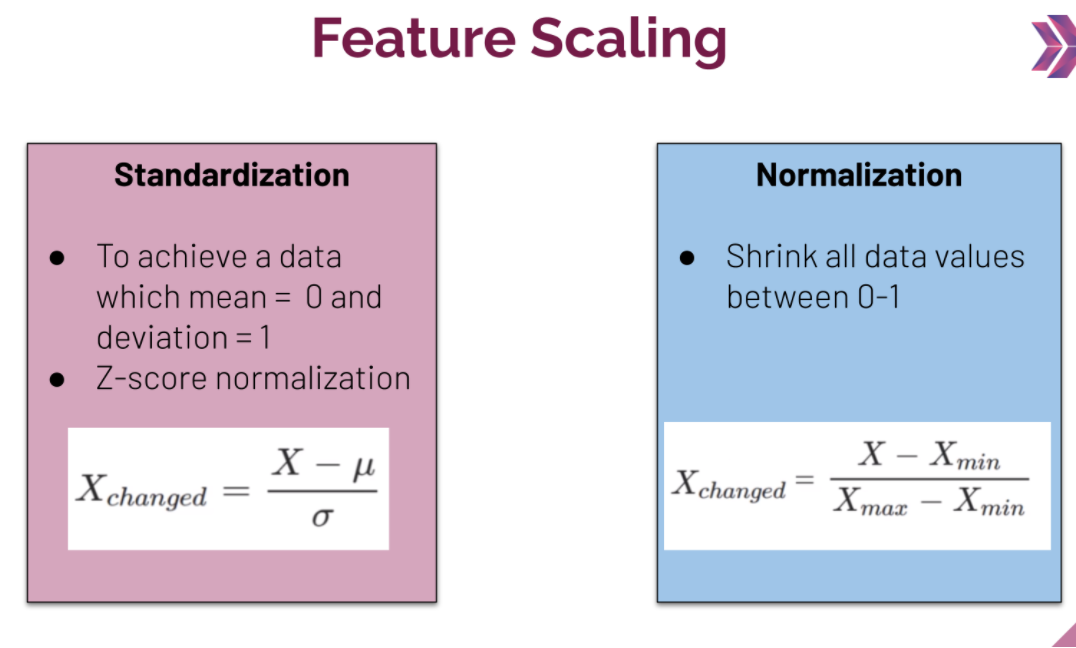

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [11]:
scaler.fit(X_train)  

StandardScaler()

In [12]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.40424839, -1.02823707, -0.33767538, ..., -0.44017978,
        -0.35817255, -0.28930697],
       [ 0.32060772, -0.91982774, -1.16143931, ..., -0.44391152,
        -0.36370582, -0.29622876],
       [-1.27051084,  0.2591237 ,  0.25425079, ..., -0.28157937,
        -0.26073421, -0.24008316],
       ...,
       [ 0.80424121,  0.71986334,  1.43317042, ...,  0.7705482 ,
         0.6680601 ,  0.45733704],
       [ 0.1851428 , -0.87239866, -0.60897488, ..., -0.44115811,
        -0.36130657, -0.29446003],
       [ 1.54692165, -0.86562307, -0.42153159, ..., -0.43876277,
        -0.35836127, -0.29150925]])

In [13]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.15781217,  0.59112727,  1.13227461, ...,  0.33494015,
         0.26526052,  0.14042253],
       [ 0.53925283,  1.68199613,  1.13227461, ...,  1.33091017,
         0.5857351 ,  0.14042253],
       [ 1.69783431,  0.36753303,  0.65380096, ..., -0.10377617,
        -0.11321161, -0.13764621],
       ...,
       [ 1.46968288,  0.40818653,  1.46769945, ...,  0.49244978,
         0.5693803 ,  0.50311419],
       [-0.38998892, -0.55394626, -1.21076649, ..., -0.44385169,
        -0.36371371, -0.29623523],
       [-1.45588388, -1.44154763, -0.45606062, ..., -0.44391134,
        -0.36299878, -0.292234  ]])

### checking std = 1 and mean = 0

this gives us the z-scores. so it's also called z-score scaling

These values show where in the normal distribution they correspond to the z score.


In [14]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000
std,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003


In [15]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.177,0.132,0.15,-0.124,-0.013,0.078,0.134,0.132,0.309,-0.096,-0.005,0.081,0.037,0.053,0.172,0.129,0.121,0.253,0.454,-0.084,-0.004,0.079,0.029,0.041,0.130,0.060,0.045,0.094,0.203,0.126,0.103,0.231,0.379,0.579,-0.08,-0.012,0.072,0.014,0.029,0.104,0.042,0.023,0.048,0.124,0.076,0.038,0.076,0.109,0.207,0.127,0.086,0.203,0.355,0.497,0.682
std,1.087,1.023,1.33,1.021,1.074,1.200,1.051,1.239,1.701,0.975,1.004,1.140,1.069,1.028,1.203,1.092,1.185,1.605,2.209,0.946,0.920,1.070,0.961,0.923,1.057,1.101,0.996,0.971,1.158,1.133,1.153,1.537,2.113,2.781,0.93,0.853,1.003,0.834,0.826,0.929,0.966,0.853,0.806,0.916,1.149,1.012,0.952,0.897,1.102,1.171,1.140,1.467,2.036,2.708,3.371


In [16]:
print("X_train_range  :", np.min(X_train_scaled), "-", np.max(X_train_scaled))
print("X_test_range   :", np.min(X_test_scaled), "-", np.max(X_test_scaled))

X_train_range  : -1.7743452470883727 - 11.281387258586248
X_test_range   : -1.7184956785959022 - 19.998892674617288


## Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [18]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [19]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [21]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.997581,-1.423718
mae,0.187958,2.107643
mse,0.062748,76.501251
rmse,0.250495,8.746499


## Multicolineratiy

If there is a strong correlation between the independent variables, this situation is called **multicolineraty**.
 
**Multicolineraty** prevents my model from detecting important features.

In [22]:
def color_red(val):
    
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'
pd.DataFrame(poly_features).corr().style.applymap(color_red)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

## Cross Validate

We do cross-validation to check whether the one-time scores we receive are consistent or not

cross validation is only applied to the train set.

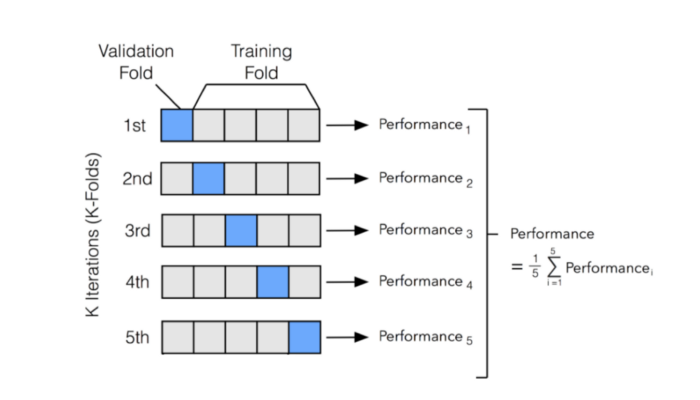

In [23]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [24]:
from sklearn.model_selection import cross_validate, cross_val_score

In [25]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [26]:
scores

{'fit_time': array([0.00501537, 0.00399852, 0.00498414, 0.00399852, 0.0050056 ,
        0.00397849, 0.0059948 , 0.01099038, 0.00701213, 0.00400186]),
 'score_time': array([0.00699234, 0.00300813, 0.00301075, 0.00398517, 0.00300336,
        0.00801301, 0.00299478, 0.00299859, 0.00398779, 0.00199842]),
 'test_r2': array([ 0.94345854,  0.98360242,  0.97961969, -5.69207862,  0.99353704,
         0.99682955,  0.9907342 ,  0.99244878,  0.97990659,  0.99041525]),
 'test_neg_mean_absolute_error': array([-0.38633232, -0.45398645, -0.43863405, -3.57023678, -0.30378975,
        -0.27952145, -0.33635204, -0.4075215 , -0.44307322, -0.26112228]),
 'test_neg_mean_squared_error': array([-2.83944122e-01, -3.90895190e-01, -3.64727908e-01, -1.66686869e+02,
        -1.53806155e-01, -1.04168470e-01, -2.00499895e-01, -3.08898901e-01,
        -6.10626218e-01, -1.23433602e-01]),
 'test_neg_root_mean_squared_error': array([ -0.53286407,  -0.62521611,  -0.60392707, -12.91072691,
         -0.39218128,  -0.322751

In [27]:
pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.005015,0.006992,0.943459,-0.386332,-0.283944,-0.532864
2,0.003999,0.003008,0.983602,-0.453986,-0.390895,-0.625216
3,0.004984,0.003011,0.979620,-0.438634,-0.364728,-0.603927
4,0.003999,0.003985,-5.692079,-3.570237,-166.686869,-12.910727
5,0.005006,0.003003,0.993537,-0.303790,-0.153806,-0.392181
6,0.003978,0.008013,0.996830,-0.279521,-0.104168,-0.322751
7,0.005995,0.002995,0.990734,-0.336352,-0.200500,-0.447772
8,0.010990,0.002999,0.992449,-0.407521,-0.308899,-0.555787
9,0.007012,0.003988,0.979907,-0.443073,-0.610626,-0.781426
10,0.004002,0.001998,0.990415,-0.261122,-0.123434,-0.351331


In [28]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                              0.315847
test_neg_mean_absolute_error        -0.688057
test_neg_mean_squared_error        -16.922787
test_neg_root_mean_squared_error    -1.752398
dtype: float64

In [29]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.997581,-1.423718
mae,0.187958,2.107643
mse,0.062748,76.501251
rmse,0.250495,8.746499


In [30]:
lm.coef_

array([ 16.59727508,  -5.40405972,  -1.74928347, -62.33833778,
        16.90858661, -17.0396797 ,  18.33163138,  17.36342203,
        13.11462122, 111.07662344, -22.81391604,  44.26971429,
       -14.94945789, -26.02529709,  32.27766406, -29.6922559 ,
       -17.88079357, -30.82621205, -35.40557097, -93.69458809,
        27.30198689, -49.13969978, -10.86611732,  44.48527329,
       -55.26045722,  24.00912753,   1.98877056,  14.83064039,
       -16.4443257 ,  24.55166492,   2.88839217,  27.34790657,
        21.76432967,  42.14254255,  29.91636033, -12.96100179,
        20.98438147,  12.13988278, -26.82413453,  26.51197649,
        -7.92317222,   4.38181124,  -7.34055459,  14.14705248,
        -4.83551241,  -4.8904204 ,   2.54950883, -11.77617458,
         7.74633833, -10.15349317,   8.1863474 , -17.73958393,
         1.13383523,  -8.53196007, -20.74476395])

In [31]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,16.597275
1,-5.404060
2,-1.749283
3,-62.338338
4,16.908587
5,-17.039680
6,18.331631
7,17.363422
8,13.114621
9,111.076623


## Ridge Regression

Ridge and lasso and elastic-net regression are a model tuning method that is used to analyse any data that suffers from multicollinearity, underfiting (If there is an underfiting caused by the alpha parameter) and overfiting. 

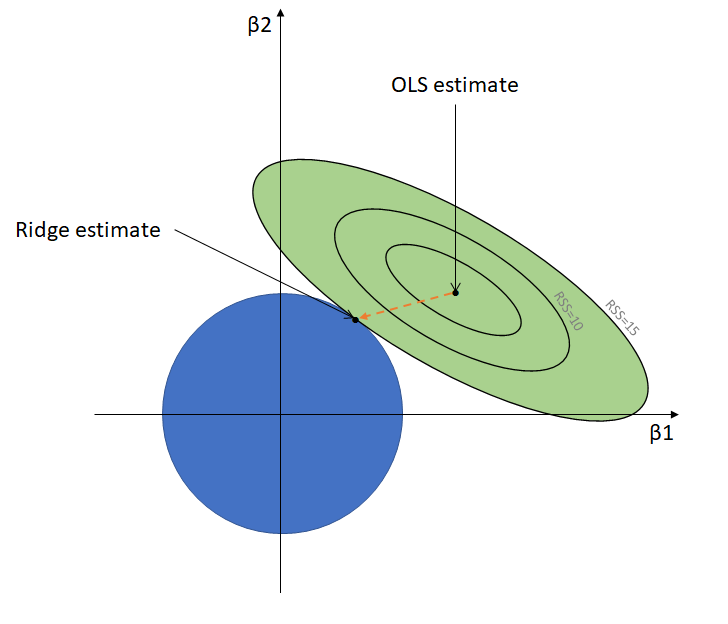

In [32]:
from sklearn.linear_model import Ridge

In [33]:
ridge_model = Ridge(alpha=1)  # negative hata vermese de alpha her zaman pozitif olmali. default alpha=1

In [34]:
ridge_model.fit(X_train_scaled, y_train)  # mutlaka scaled edilmis veriyle

Ridge(alpha=1)

In [35]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [36]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.987205,0.984232
mae,0.364623,0.557799
mse,0.331859,0.497710
rmse,0.576072,0.705486


In [37]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.997581,-1.423718,0.987205,0.984232
mae,0.187958,2.107643,0.364623,0.557799
mse,0.062748,76.501251,0.331859,0.497710
rmse,0.250495,8.746499,0.576072,0.705486


## For Ridge Regression CV with alpha : 1 

In [38]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [39]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.004996,0.007003,0.909424,-0.554577,-0.454859,-0.674433
2,0.002995,0.003002,0.988384,-0.407609,-0.276898,-0.526211
3,0.003011,0.005995,0.985714,-0.415267,-0.255661,-0.505629
4,0.002992,0.002006,0.920100,-0.763229,-1.990155,-1.410728
5,0.001998,0.003003,0.995553,-0.257907,-0.105827,-0.325311
6,0.003993,0.003001,0.977663,-0.388813,-0.733912,-0.856687
7,0.002002,0.002001,0.992759,-0.365033,-0.156693,-0.395845
8,0.002002,0.002998,0.993167,-0.439520,-0.279522,-0.528698
9,0.003006,0.002996,0.915947,-0.754910,-2.554330,-1.598227
10,0.002003,0.002000,0.985719,-0.338109,-0.183907,-0.428843


In [40]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.966443
test_neg_mean_absolute_error       -0.468497
test_neg_mean_squared_error        -0.699176
test_neg_root_mean_squared_error   -0.725061
dtype: float64

In [41]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.987205,0.984232
mae,0.364623,0.557799
mse,0.331859,0.497710
rmse,0.576072,0.705486


In [42]:
ridge_model.coef_

array([ 3.71450604e+00,  6.75147866e-01,  2.45026233e-01, -1.03692214e+00,
        2.49619996e+00,  2.50747065e-01, -3.80972752e-02,  1.63781753e-01,
       -1.92793081e-01, -1.06022676e+00, -6.67857903e-02, -8.12695795e-01,
        1.25026950e+00,  4.88024688e-02,  1.10978317e-01, -3.07452443e-01,
        9.43623052e-02, -8.78442019e-02,  1.78689946e-04, -2.82098333e-01,
        1.79583653e-02, -2.63853784e-01, -4.24176994e-01, -2.44464854e-01,
       -1.13438874e-01,  6.99959186e-01, -1.51234093e-01, -8.44789444e-03,
        1.09260084e-01, -3.00740259e-01,  1.18474476e-01, -1.99970798e-02,
        1.00228457e-02,  6.94485746e-02,  4.49056790e-01,  4.73744361e-01,
        4.37318666e-01, -1.85196676e-01,  2.84736636e-01,  2.57367999e-01,
       -6.40738959e-01, -1.85031251e-01,  1.42459291e-01, -2.09667359e-03,
        4.09916098e-01, -2.01252496e-01,  3.47886931e-03,  6.83023968e-02,
       -1.15775095e-01, -1.65831448e-01,  1.58292458e-01,  3.60547037e-03,
        1.65384202e-03, -

In [43]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [44]:
pd.concat([lm_df,rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,16.597275,3.714506
1,-5.404060,0.675148
2,-1.749283,0.245026
3,-62.338338,-1.036922
4,16.908587,2.496200
5,-17.039680,0.250747
6,18.331631,-0.038097
7,17.363422,0.163782
8,13.114621,-0.192793
9,111.076623,-1.060227


## Choosing best alpha value with GridSearchCV for Ridge

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [47]:
ridge_model = Ridge()

In [48]:
param_grid = {"alpha":alpha_space}

In [49]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2, return_train_score=True)

In [50]:
grid_ridge.fit(X_train_scaled, y_train) # model = Ridge(alpha=0.02)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ...................................

[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.13; total time=   0.0s
[CV] END .........................................alpha=0.13; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.23; total time=   0.0s
[CV] END ..........................alpha=0.24000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.24000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.24000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.24000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.24000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.24000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.24000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.24000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.24000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.24000000000000002; total time=   0.0s
[CV] END .........................................alpha=0.25; total time=   0.0s
[CV] END ...................

[CV] END ..........................alpha=0.35000000000000003; total time=   0.0s
[CV] END ..........................alpha=0.35000000000000003; total time=   0.0s
[CV] END ..........................alpha=0.35000000000000003; total time=   0.0s
[CV] END ..........................alpha=0.35000000000000003; total time=   0.0s
[CV] END ..........................alpha=0.35000000000000003; total time=   0.0s
[CV] END ..........................alpha=0.35000000000000003; total time=   0.0s
[CV] END ..........................alpha=0.35000000000000003; total time=   0.0s
[CV] END ..........................alpha=0.35000000000000003; total time=   0.0s
[CV] END ..........................alpha=0.36000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.36000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.36000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.36000000000000004; total time=   0.0s
[CV] END ...................

[CV] END ..........................alpha=0.48000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.48000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.48000000000000004; total time=   0.0s
[CV] END .........................................alpha=0.49; total time=   0.0s
[CV] END .........................................alpha=0.49; total time=   0.0s
[CV] END .........................................alpha=0.49; total time=   0.0s
[CV] END .........................................alpha=0.49; total time=   0.0s
[CV] END .........................................alpha=0.49; total time=   0.0s
[CV] END .........................................alpha=0.49; total time=   0.0s
[CV] END .........................................alpha=0.49; total time=   0.0s
[CV] END .........................................alpha=0.49; total time=   0.0s
[CV] END .........................................alpha=0.49; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END .........................................alpha=0.61; total time=   0.0s
[CV] END .........................................alpha=0.61; total time=   0.0s
[CV] END .........................................alpha=0.61; total time=   0.0s
[CV] END .........................................alpha=0.61; total time=   0.0s
[CV] END .........................................alpha=0.61; total time=   0.0s
[CV] END .........................................alpha=0.61; total time=   0.0s
[CV] END .........................................alpha=0.61; total time=   0.0s
[CV] END .........................................alpha=0.61; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.72; total time=   0.0s
[CV] END .........................................alpha=0.72; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.85; total time=   0.0s
[CV] END .........................................alpha=0.85; total time=   0.0s
[CV] END .........................................alpha=0.85; total time=   0.0s
[CV] END .........................................alpha=0.85; total time=   0.0s
[CV] END .........................................alpha=0.85; total time=   0.0s
[CV] END .........................................alpha=0.85; total time=   0.0s
[CV] END .........................................alpha=0.85; total time=   0.0s
[CV] END .........................................alpha=0.86; total time=   0.0s
[CV] END .........................................alpha=0.86; total time=   0.0s
[CV] END .........................................alpha=0.86; total time=   0.0s
[CV] END .........................................alpha=0.86; total time=   0.0s
[CV] END .........................................alpha=0.86; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END .........................................alpha=0.98; total time=   0.0s
[CV] END .........................................alpha=0.98; total time=   0.0s
[CV] END .........................................alpha=0.98; total time=   0.0s
[CV] END .........................................alpha=0.98; total time=   0.0s
[CV] END .........................................alpha=0.98; total time=   0.0s
[CV] END .........................................alpha=0.98; total time=   0.0s
[CV] END .........................................alpha=0.98; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [51]:
grid_ridge.best_params_

{'alpha': 0.02}

In [52]:
pd.DataFrame(grid_ridge.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003403,0.001026,0.001098,0.000300,0.01,{'alpha': 0.01},-0.578223,-0.592915,-0.666675,-1.058334,-0.410494,-0.547762,-0.408349,-0.458808,-1.321346,-0.342178,-0.638509,0.297040,2
1,0.003301,0.000454,0.001298,0.000643,0.02,{'alpha': 0.02},-0.554132,-0.604376,-0.676790,-0.684998,-0.417295,-0.586006,-0.373666,-0.436309,-1.365495,-0.347477,-0.604654,0.278635,1
2,0.003198,0.000750,0.000801,0.000602,0.03,{'alpha': 0.03},-0.548039,-0.614906,-0.673756,-0.992339,-0.425431,-0.612027,-0.354327,-0.427492,-1.387301,-0.351224,-0.638684,0.308187,3
3,0.003063,0.000795,0.000900,0.000541,0.04,{'alpha': 0.04},-0.547655,-0.622293,-0.666758,-1.270073,-0.431859,-0.630645,-0.342303,-0.424330,-1.400078,-0.353994,-0.668999,0.351597,4
4,0.002799,0.000600,0.001002,0.000448,0.05,{'alpha': 0.05},-0.549274,-0.627121,-0.658777,-1.472465,-0.436510,-0.644739,-0.334434,-0.423703,-1.408497,-0.356183,-0.691170,0.390933,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.002667,0.000575,0.000896,0.000299,0.96,{'alpha': 0.9600000000000001},-0.670845,-0.528425,-0.507336,-1.436843,-0.327339,-0.851722,-0.393058,-0.525084,-1.592702,-0.426487,-0.725984,0.419765,12
96,0.002839,0.000819,0.000507,0.000507,0.97,{'alpha': 0.97},-0.671750,-0.527857,-0.506899,-1.430224,-0.326808,-0.852973,-0.393762,-0.525993,-1.594097,-0.427080,-0.725744,0.418921,11
97,0.002998,0.000007,0.000503,0.000503,0.98,{'alpha': 0.98},-0.672650,-0.527299,-0.506470,-1.423665,-0.326293,-0.854218,-0.394461,-0.526899,-1.595482,-0.427671,-0.725511,0.418093,10
98,0.002719,0.000627,0.000798,0.000399,0.99,{'alpha': 0.99},-0.673544,-0.526750,-0.506046,-1.417167,-0.325794,-0.855455,-0.395155,-0.527800,-1.596859,-0.428259,-0.725283,0.417283,9


In [53]:
grid_ridge.best_index_

1

In [ ]:
pd.DataFrame(grid_ridge.cv_results_).loc[1,["mean_test_score", "mean_train_score"]]

In [54]:
grid_ridge.best_score_

-0.6046542768937522

In [55]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

In [56]:
rgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rgs

,grid_ridge_train,grid_ridge_test
R2,0.993766,0.989353
mae,0.271564,0.410962
mse,0.161686,0.336050
rmse,0.402102,0.579698


In [57]:
pd.concat([ls, rs, rgs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test
R2,0.997581,-1.423718,0.987205,0.984232,0.993766,0.989353
mae,0.187958,2.107643,0.364623,0.557799,0.271564,0.410962
mse,0.062748,76.501251,0.331859,0.497710,0.161686,0.336050
rmse,0.250495,8.746499,0.576072,0.705486,0.402102,0.579698


In [58]:
rm = Ridge(alpha=0.02).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
rm.coef_

array([  7.45625463,   0.13786108,   1.16486714, -10.18153931,
         4.61608206,  -1.25503733,   0.33042816,   0.78901269,
        -1.77479528,   3.10639146,  -3.15252645,  -1.26649515,
         0.43831683,  -0.53218919,   1.18458917,  -0.21141339,
         0.38750327,  -1.35413514,   0.39189611,   4.3004558 ,
         4.40676019,   2.30597279,  -3.10358629,   1.78779727,
         0.09856193,   1.54687505,  -0.83217856,  -0.78611457,
         0.71354068,  -0.40265794,   0.1448194 ,   0.14369358,
         0.55987005,   1.42302118,  -2.84496696,  -2.01918122,
        -0.63602304,   3.14601169,  -2.10227164,  -0.54967264,
        -3.70340385,   1.65632943,   1.12644095,   0.03750742,
         2.39600492,  -0.49305799,  -0.53507419,  -0.14507989,
        -0.7541191 ,  -0.43272424,  -0.43997281,   0.07342927,
         0.79820263,  -0.4177175 ,  -0.92156695])

In [59]:
rgm_df = pd.DataFrame(rm.coef_, columns=["ridge_coef_0.02"])

In [60]:
pd.concat([lm_df,rm_df, rgm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.02
0,16.597275,3.714506,7.456255
1,-5.404060,0.675148,0.137861
2,-1.749283,0.245026,1.164867
3,-62.338338,-1.036922,-10.181539
4,16.908587,2.496200,4.616082
5,-17.039680,0.250747,-1.255037
6,18.331631,-0.038097,0.330428
7,17.363422,0.163782,0.789013
8,13.114621,-0.192793,-1.774795
9,111.076623,-1.060227,3.106391


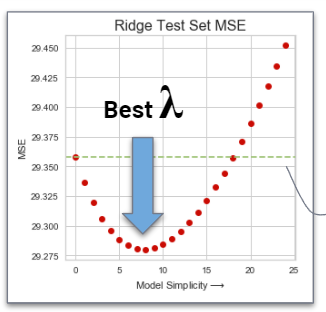

## LASSO

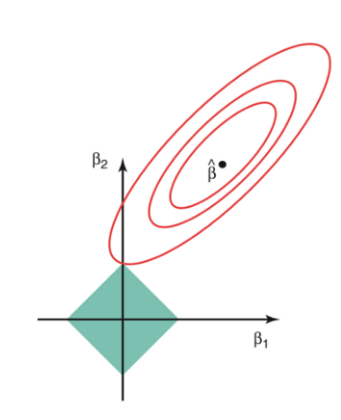

In [61]:
from sklearn.linear_model import Lasso

In [62]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1)

In [63]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [64]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.916066,0.918582
mae,1.021833,1.194105
mse,2.176931,2.569845
rmse,1.475443,1.603074


In [65]:
pd.concat([ls, rs, rgs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test
R2,0.997581,-1.423718,0.987205,0.984232,0.993766,0.989353,0.916066,0.918582
mae,0.187958,2.107643,0.364623,0.557799,0.271564,0.410962,1.021833,1.194105
mse,0.062748,76.501251,0.331859,0.497710,0.161686,0.336050,2.176931,2.569845
rmse,0.250495,8.746499,0.576072,0.705486,0.402102,0.579698,1.475443,1.603074


## For Lasso CV with Default Alpha : 1

In [66]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [67]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.005992,0.006006,0.706630,-0.806709,-1.473267,-1.213782
2,0.003013,0.002999,0.918510,-0.997634,-1.942615,-1.393777
3,0.004010,0.004991,0.962622,-0.693933,-0.668914,-0.817872
4,0.003987,0.004006,0.933193,-0.940894,-1.664037,-1.289976
5,0.002989,0.002000,0.928358,-1.158430,-1.704932,-1.305730
6,0.002000,0.002000,0.866498,-1.387719,-4.386342,-2.094360
7,0.002001,0.004014,0.928574,-1.016796,-1.545570,-1.243209
8,0.001997,0.001999,0.941482,-1.161680,-2.393813,-1.547195
9,0.002005,0.002992,0.811842,-1.486293,-5.718008,-2.391236
10,0.003004,0.002996,0.905500,-0.829083,-1.216981,-1.103169


In [68]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.890321
test_neg_mean_absolute_error       -1.047917
test_neg_mean_squared_error        -2.271448
test_neg_root_mean_squared_error   -1.440031
dtype: float64

In [69]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.916066,0.918582
mae,1.021833,1.194105
mse,2.176931,2.569845
rmse,1.475443,1.603074


In [70]:
lasso_model.coef_

array([0.69600691, 0.        , 0.        , 0.        , 3.44893766,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [71]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [72]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1
0,16.597275,3.714506,7.456255,0.696007
1,-5.404060,0.675148,0.137861,0.000000
2,-1.749283,0.245026,1.164867,0.000000
3,-62.338338,-1.036922,-10.181539,0.000000
4,16.908587,2.496200,4.616082,3.448938
5,-17.039680,0.250747,-1.255037,0.000000
6,18.331631,-0.038097,0.330428,0.000000
7,17.363422,0.163782,0.789013,0.000000
8,13.114621,-0.192793,-1.774795,0.000000
9,111.076623,-1.060227,3.106391,0.000000


## Choosing best alpha value with GridSearchCV for Lasso

In [73]:
lasso_model = Lasso(max_iter=100000)

In [74]:
param_grid = {"alpha":alpha_space}

In [75]:
grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [76]:
grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ...................................

[CV] END .........................................alpha=0.13; total time=   0.0s
[CV] END .........................................alpha=0.13; total time=   0.0s
[CV] END .........................................alpha=0.13; total time=   0.0s
[CV] END .........................................alpha=0.13; total time=   0.0s
[CV] END .........................................alpha=0.13; total time=   0.0s
[CV] END .........................................alpha=0.13; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END .........................................alpha=0.14; total time=   0.0s
[CV] END ...................

[CV] END ..........................alpha=0.24000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.24000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.24000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.24000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.24000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.24000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.24000000000000002; total time=   0.0s
[CV] END .........................................alpha=0.25; total time=   0.0s
[CV] END .........................................alpha=0.25; total time=   0.0s
[CV] END .........................................alpha=0.25; total time=   0.0s
[CV] END .........................................alpha=0.25; total time=   0.0s
[CV] END .........................................alpha=0.25; total time=   0.0s
[CV] END ...................

[CV] END ..........................alpha=0.36000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.36000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.36000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.36000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.36000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.36000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.36000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.36000000000000004; total time=   0.0s
[CV] END .........................................alpha=0.37; total time=   0.0s
[CV] END .........................................alpha=0.37; total time=   0.0s
[CV] END .........................................alpha=0.37; total time=   0.0s
[CV] END .........................................alpha=0.37; total time=   0.0s
[CV] END ...................

[CV] END ..........................alpha=0.47000000000000003; total time=   0.0s
[CV] END ..........................alpha=0.48000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.48000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.48000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.48000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.48000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.48000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.48000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.48000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.48000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.48000000000000004; total time=   0.0s
[CV] END .........................................alpha=0.49; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END .........................................alpha=0.61; total time=   0.0s
[CV] END .........................................alpha=0.61; total time=   0.0s
[CV] END .........................................alpha=0.61; total time=   0.0s
[CV] END .........................................alpha=0.61; total time=   0.0s
[CV] END .........................................alpha=0.61; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.72; total time=   0.0s
[CV] END .........................................alpha=0.72; total time=   0.0s
[CV] END .........................................alpha=0.72; total time=   0.0s
[CV] END .........................................alpha=0.72; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END .........................................alpha=0.73; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.8200000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8200000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END .........................................alpha=0.93; total time=   0.0s
[CV] END ...........................alpha=0.9400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9400000000000001; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [77]:
grid_lasso.best_params_

{'alpha': 0.01}

In [78]:
pd.DataFrame(grid_lasso.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026497,0.015472,0.001304,0.000461,0.01,{'alpha': 0.01},-0.640074,-0.455180,-0.453849,-0.568445,-0.312742,-0.766548,-0.355874,-0.505170,-1.460154,-0.357387,-0.587542,0.319524,1
1,0.015674,0.003954,0.001098,0.000300,0.02,{'alpha': 0.02},-0.755804,-0.431334,-0.429478,-0.608526,-0.305372,-0.926101,-0.405952,-0.549365,-1.563317,-0.416638,-0.639189,0.355174,2
2,0.005293,0.001110,0.000808,0.000405,0.03,{'alpha': 0.03},-0.783366,-0.463347,-0.445451,-0.640952,-0.335884,-0.994760,-0.468963,-0.606199,-1.587274,-0.483266,-0.680946,0.352629,3
3,0.004540,0.000827,0.000756,0.000522,0.04,{'alpha': 0.04},-0.776570,-0.449286,-0.428381,-0.631607,-0.347871,-1.039017,-0.482644,-0.623430,-1.611260,-0.487520,-0.687759,0.362388,4
4,0.006355,0.002964,0.001001,0.000003,0.05,{'alpha': 0.05},-0.819641,-0.449879,-0.413288,-0.638668,-0.364049,-1.114269,-0.502632,-0.644489,-1.658988,-0.506370,-0.711227,0.380164,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.002437,0.000668,0.001050,0.000473,0.96,{'alpha': 0.9600000000000001},-1.181334,-1.350946,-0.785174,-1.256340,-1.265645,-2.057793,-1.216126,-1.500068,-2.359069,-1.079459,-1.405195,0.443365,96
96,0.002743,0.000940,0.000992,0.000749,0.97,{'alpha': 0.97},-1.189395,-1.361578,-0.793297,-1.264663,-1.275626,-2.066898,-1.222854,-1.511752,-2.367082,-1.085341,-1.413848,0.443697,97
97,0.001906,0.001378,0.000499,0.000499,0.98,{'alpha': 0.98},-1.197490,-1.372261,-0.801454,-1.273044,-1.285635,-2.076027,-1.229610,-1.523502,-2.375114,-1.091254,-1.422539,0.444030,98
98,0.002800,0.000601,0.000900,0.000700,0.99,{'alpha': 0.99},-1.205620,-1.382994,-0.809646,-1.281482,-1.295670,-2.085181,-1.236396,-1.535317,-2.383165,-1.097197,-1.431267,0.444365,99


In [79]:
grid_lasso.best_index_

0

In [ ]:
pd.DataFrame(grid_lasso.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

In [80]:
grid_lasso.best_score_

-0.5875421384283495

In [81]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [82]:
lgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lgs

,grid_lasso_train,grid_lasso_test
R2,0.987457,0.989858
mae,0.354610,0.447532
mse,0.325331,0.320103
rmse,0.570378,0.565776


In [83]:
pd.concat([ls, rs, rgs, lss, lgs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test
R2,0.997581,-1.423718,0.987205,0.984232,0.993766,0.989353,0.916066,0.918582,0.987457,0.989858
mae,0.187958,2.107643,0.364623,0.557799,0.271564,0.410962,1.021833,1.194105,0.354610,0.447532
mse,0.062748,76.501251,0.331859,0.497710,0.161686,0.336050,2.176931,2.569845,0.325331,0.320103
rmse,0.250495,8.746499,0.576072,0.705486,0.402102,0.579698,1.475443,1.603074,0.570378,0.565776


In [84]:
lsm = Lasso(alpha=0.01).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
lsm.coef_

array([ 4.55437318,  0.41386104,  0.14316515, -3.27936306,  3.48758515,
       -0.        ,  0.        ,  0.05343882,  0.        , -0.        ,
       -0.        , -0.21411016,  0.02441056, -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.09397831,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.40883055,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.0186714 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [85]:
lgm_df = pd.DataFrame(lsm.coef_, columns=["lasso_coef_0.01"])

In [86]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1,lasso_coef_0.01
0,16.597275,3.714506,7.456255,0.696007,4.554373
1,-5.404060,0.675148,0.137861,0.000000,0.413861
2,-1.749283,0.245026,1.164867,0.000000,0.143165
3,-62.338338,-1.036922,-10.181539,0.000000,-3.279363
4,16.908587,2.496200,4.616082,3.448938,3.487585
5,-17.039680,0.250747,-1.255037,0.000000,-0.000000
6,18.331631,-0.038097,0.330428,0.000000,0.000000
7,17.363422,0.163782,0.789013,0.000000,0.053439
8,13.114621,-0.192793,-1.774795,0.000000,0.000000
9,111.076623,-1.060227,3.106391,0.000000,-0.000000


## Elastic net

In [87]:
from sklearn.linear_model import ElasticNet

In [88]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1)

In [89]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [90]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.894391,0.902784
mae,1.230023,1.386981
mse,2.739112,3.068501
rmse,1.655026,1.751714


In [91]:
pd.concat([ls,rs, rgs, lss, lgs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,elastic_train,elastic_test
R2,0.997581,-1.423718,0.987205,0.984232,0.993766,0.989353,0.916066,0.918582,0.987457,0.989858,0.894391,0.902784
mae,0.187958,2.107643,0.364623,0.557799,0.271564,0.410962,1.021833,1.194105,0.354610,0.447532,1.230023,1.386981
mse,0.062748,76.501251,0.331859,0.497710,0.161686,0.336050,2.176931,2.569845,0.325331,0.320103,2.739112,3.068501
rmse,0.250495,8.746499,0.576072,0.705486,0.402102,0.579698,1.475443,1.603074,0.570378,0.565776,1.655026,1.751714


## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [92]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [93]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.547624,-1.018845,-2.271774,-1.507240
2,0.903256,-1.109199,-2.306241,-1.518631
3,0.918673,-1.121764,-1.455439,-1.206416
4,0.904224,-1.185324,-2.385598,-1.544538
5,0.892673,-1.435062,-2.554173,-1.598178
6,0.851579,-1.571109,-4.876523,-2.208285
7,0.898629,-1.307859,-2.193529,-1.481057
8,0.939770,-1.192495,-2.463854,-1.569667
9,0.779346,-1.668970,-6.705541,-2.589506
10,0.857503,-1.064891,-1.835097,-1.354658


In [94]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.849328
test_neg_mean_absolute_error       -1.267552
test_neg_mean_squared_error        -2.904777
test_neg_root_mean_squared_error   -1.657818
dtype: float64

In [95]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.894391,0.902784
mae,1.230023,1.386981
mse,2.739112,3.068501
rmse,1.655026,1.751714


In [96]:
elastic_model.coef_

array([0.85603327, 0.24929442, 0.        , 0.30397154, 0.97032476,
       0.05791825, 0.0121961 , 0.        , 0.        , 0.        ,
       0.51222851, 0.        , 0.59352013, 0.10500738, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.15851285, 0.        , 0.24709461, 0.        , 0.        ,
       0.32883609, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03940337, 0.        , 0.        , 0.        , 0.13863323,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [97]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [98]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1,lasso_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,16.597275,3.714506,7.456255,0.696007,4.554373,0.856033
1,-5.404060,0.675148,0.137861,0.000000,0.413861,0.249294
2,-1.749283,0.245026,1.164867,0.000000,0.143165,0.000000
3,-62.338338,-1.036922,-10.181539,0.000000,-3.279363,0.303972
4,16.908587,2.496200,4.616082,3.448938,3.487585,0.970325
5,-17.039680,0.250747,-1.255037,0.000000,-0.000000,0.057918
6,18.331631,-0.038097,0.330428,0.000000,0.000000,0.012196
7,17.363422,0.163782,0.789013,0.000000,0.053439,0.000000
8,13.114621,-0.192793,-1.774795,0.000000,0.000000,0.000000
9,111.076623,-1.060227,3.106391,0.000000,-0.000000,0.000000


## Choosing best alpha value with GridSearchCV for Elastic-Net

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
elastic_model = ElasticNet(max_iter=10000)

In [101]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [102]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [103]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01

[CV] END .........................alpha=0.012, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.99; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.99; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.99; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.99; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [104]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [105]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.083706,0.019110,0.000910,0.000304,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-0.708995,-0.497416,-0.492460,-0.933867,-0.311012,-0.895848,-0.419949,-0.550828,-1.640591,-0.452782,-0.690375,0.370694,13
1,0.010308,0.000873,0.001116,0.000295,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-0.696573,-0.464931,-0.488251,-0.645618,-0.301419,-0.856338,-0.411330,-0.539318,-1.578926,-0.433894,-0.641660,0.347104,11
2,0.011520,0.002574,0.001171,0.000350,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-0.691543,-0.456031,-0.473748,-0.608671,-0.304173,-0.834613,-0.398742,-0.541070,-1.536383,-0.411820,-0.625679,0.337237,9
3,0.015721,0.001472,0.001269,0.000803,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-0.659791,-0.445560,-0.455700,-0.584536,-0.308523,-0.795746,-0.371122,-0.513933,-1.490508,-0.372763,-0.599818,0.328054,4
4,0.015463,0.003311,0.000915,0.000308,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-0.647349,-0.448045,-0.451054,-0.578595,-0.309869,-0.781653,-0.363053,-0.511787,-1.478962,-0.365116,-0.593548,0.325024,3
5,0.013690,0.002575,0.000852,0.000452,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-0.643226,-0.453766,-0.453322,-0.571015,-0.311849,-0.770197,-0.357469,-0.506857,-1.464278,-0.358732,-0.589071,0.320795,2
6,0.012640,0.001623,0.000901,0.000541,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-0.640074,-0.455180,-0.453849,-0.568445,-0.312742,-0.766548,-0.355874,-0.505170,-1.460154,-0.357387,-0.587542,0.319524,1
7,0.056571,0.012050,0.000944,0.000338,0.012,0.1,"{'alpha': 0.012, 'l1_ratio': 0.1}",-0.731227,-0.489926,-0.487782,-0.853313,-0.313691,-0.923805,-0.434313,-0.570283,-1.668642,-0.464401,-0.693738,0.373332,14
8,0.008959,0.001205,0.001001,0.000448,0.012,0.5,"{'alpha': 0.012, 'l1_ratio': 0.5}",-0.727567,-0.457801,-0.481290,-0.641157,-0.304465,-0.887413,-0.429666,-0.554474,-1.592805,-0.449894,-0.652653,0.351252,12
9,0.009158,0.001050,0.001102,0.000302,0.012,0.7,"{'alpha': 0.012, 'l1_ratio': 0.7}",-0.721583,-0.445557,-0.468102,-0.619241,-0.306544,-0.867406,-0.416801,-0.554678,-1.557080,-0.426421,-0.638341,0.343667,10


In [ ]:
pd.DataFrame(grid_model.cv_results_).loc[6, ["mean_test_score", "mean_train_score"]]

In [106]:
grid_model.best_index_

6

In [107]:
grid_model.best_score_

-0.5875421384283495

In [108]:
y_pred = grid_model.predict(X_test_scaled) # ElasticNet(alpha=0.01, l1_ratio=0.1)
y_train_pred = grid_model.predict(X_train_scaled)

In [109]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.987457,0.989858
mae,0.354610,0.447532
mse,0.325331,0.320103
rmse,0.570378,0.565776


## Final Model

In [110]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [111]:
final_model = Lasso(alpha=0.01) #grid_lasso

In [112]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)

## Prediction

In [113]:
new_sample = [[120, 30, 15]]

In [114]:
poly_sample = polynomial_converter.transform(new_sample)
poly_sample

C:\Users\walke\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


array([[1.20000e+02, 3.00000e+01, 1.50000e+01, 1.44000e+04, 3.60000e+03,
        1.80000e+03, 9.00000e+02, 4.50000e+02, 2.25000e+02, 1.72800e+06,
        4.32000e+05, 2.16000e+05, 1.08000e+05, 5.40000e+04, 2.70000e+04,
        2.70000e+04, 1.35000e+04, 6.75000e+03, 3.37500e+03, 2.07360e+08,
        5.18400e+07, 2.59200e+07, 1.29600e+07, 6.48000e+06, 3.24000e+06,
        3.24000e+06, 1.62000e+06, 8.10000e+05, 4.05000e+05, 8.10000e+05,
        4.05000e+05, 2.02500e+05, 1.01250e+05, 5.06250e+04, 2.48832e+10,
        6.22080e+09, 3.11040e+09, 1.55520e+09, 7.77600e+08, 3.88800e+08,
        3.88800e+08, 1.94400e+08, 9.72000e+07, 4.86000e+07, 9.72000e+07,
        4.86000e+07, 2.43000e+07, 1.21500e+07, 6.07500e+06, 2.43000e+07,
        1.21500e+07, 6.07500e+06, 3.03750e+06, 1.51875e+06, 7.59375e+05]])

In [115]:
scaled_sample = final_scaler.transform(poly_sample)
scaled_sample

array([[-0.31577196,  0.4548387 , -0.71597883, -0.57077539,  0.03272058,
        -0.57592103,  0.19000979, -0.40058135, -0.63510616, -0.65720536,
        -0.31206336, -0.55202038, -0.04766154, -0.38643187, -0.51941065,
        -0.03520625, -0.38068747, -0.49999458, -0.46689176, -0.65648983,
        -0.45750129, -0.52191971, -0.28669542, -0.40502644, -0.43636671,
        -0.15916772, -0.36507868, -0.43033507, -0.40034085, -0.19390994,
        -0.3974766 , -0.46387749, -0.40709947, -0.3333081 , -0.6202272 ,
        -0.49586916, -0.48043767, -0.39338379, -0.3965582 , -0.38051123,
        -0.3064592 , -0.37269676, -0.36480616, -0.32445027, -0.24449599,
        -0.37174771, -0.40748233, -0.35630191, -0.30216523, -0.29498002,
        -0.41062561, -0.44776182, -0.39109921, -0.3048257 , -0.24565976]])

In [116]:
final_model.predict(scaled_sample)

array([14.49345346])

## Feature importances with Ridge

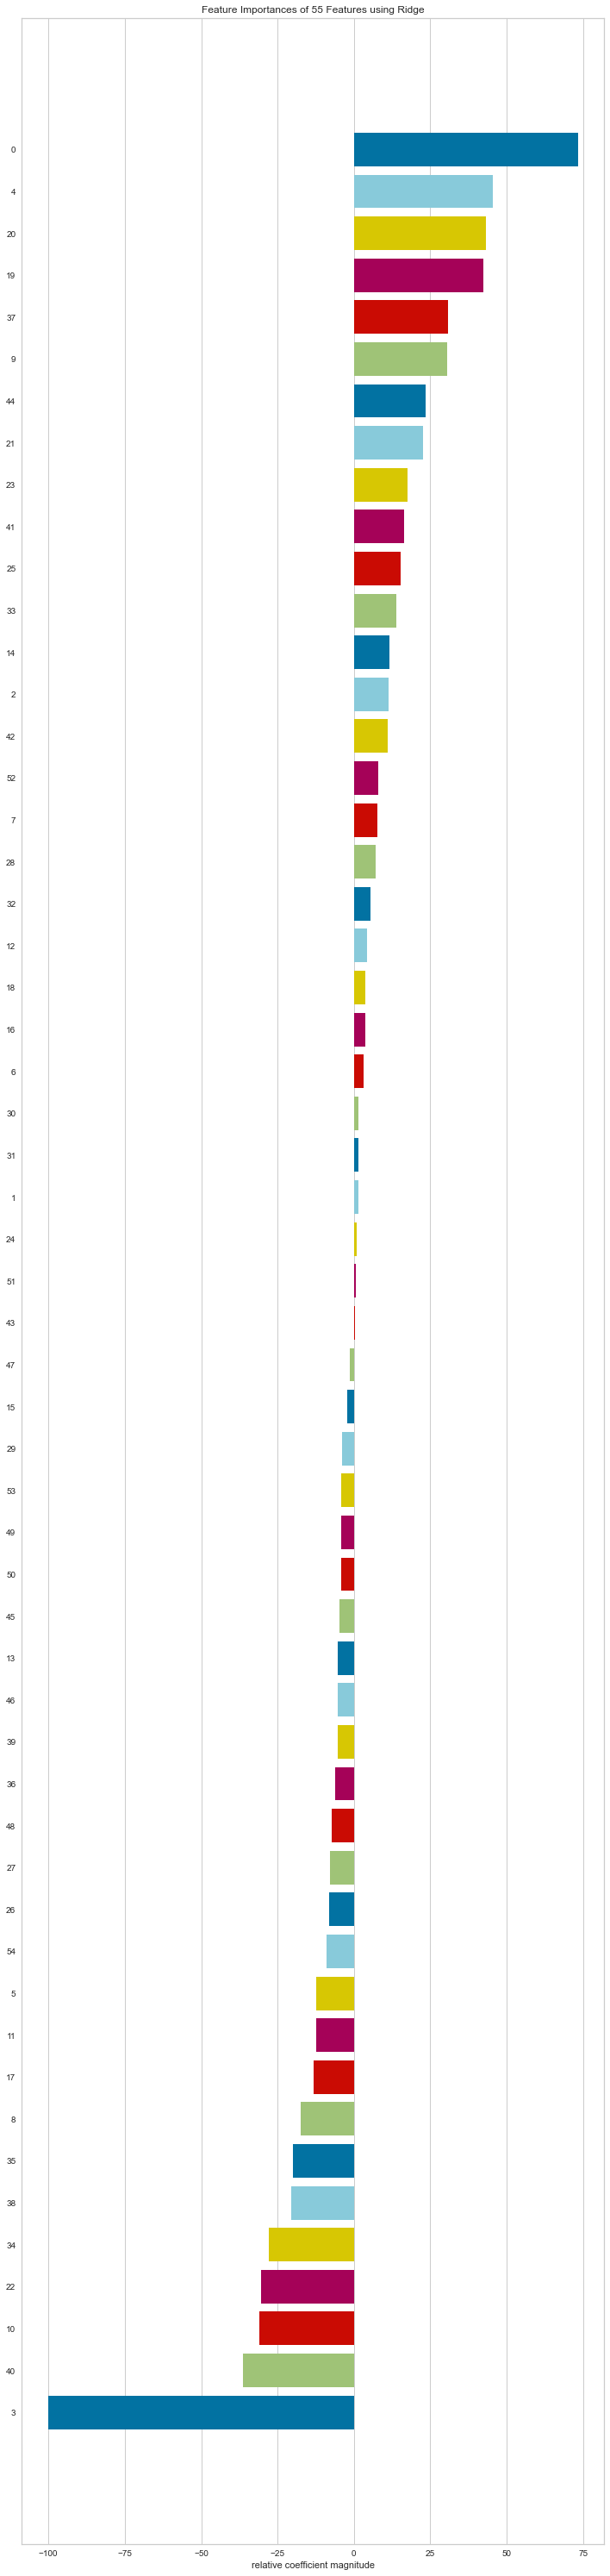

In [117]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz  # RadViz, görseli büyütmek icin

model = Ridge(alpha=0.02)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

## Feature importances with Lasso

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

## Feature Selection

In [ ]:
X_new = pd.DataFrame(poly_features)[[0, 3, 4]]
X_new

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:
scaler_new = StandardScaler()
X_train_scaled2 = scaler_new.fit_transform(X_train2)
X_test_scaled2 = scaler_new.transform(X_test2)

In [ ]:
lasso_model2 = Lasso(alpha=0.01)
lasso_model2.fit(X_train_scaled2, y_train2)

In [ ]:
y_pred2 = lasso_model2.predict(X_test_scaled2)
y_train_pred2 = lasso_model2.predict(X_train_scaled2)

In [ ]:
train_val(y_train2, y_train_pred2, y_test2, y_pred2, "lasso_new")

## For Lasso alpha values < 0.01, scores is very close 0.01 alpha scores

In [ ]:
lasso_model2 = Lasso(max_iter=1000000, alpha=0.001)

In [ ]:
lasso_model2.fit(X_train_scaled, y_train)

In [ ]:
y_pred = lasso_model2.predict(X_test_scaled)
y_train_pred = lasso_model2.predict(X_train_scaled)

In [ ]:
 train_val(y_train, y_train_pred, y_test, y_pred, "lasso_001")

In [ ]:
      grid_lasso_train	 grid_lasso_test
R2	  0.987457	         0.989858
mae	  0.354610	         0.447532
mse	  0.325331	         0.320103
rmse  0.570378	         0.565776

